<a href="https://colab.research.google.com/github/skauntey/ALMS-II-sentiment-analysis/blob/main/ALMS_Model1_250421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os, shutil
import kaggle
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Downloading kaggle competition files


In [17]:
dataset = "sentiment-analysis-on-movie-reviews"
def kaggle_dataset_download(dataset):
    kaggle.api.authenticate()
    kaggle.api.competition_download_files(dataset, path= str(os.getcwd())+"/dataset/", force = True)
    print ('Data downloaded!')

kaggle_dataset_download(dataset)

Data downloaded!


In [18]:
## In order to download the dataset make sure that kaggle.json file is available in ~/.kaggle/kaggle.json
# 'Kaggle.json' Downloading instructions are available under 'API Credential' heading of the github page
# https://github.com/Kaggle/kaggle-api

import zipfile
#Define file to download

dataset = "sentiment-analysis-on-movie-reviews"

def kaggle_dataset_download(dataset):
    kaggle.api.authenticate()
    kaggle.api.competition_download_files(dataset, path= str(os.getcwd())+"/dataset/", force = True)
    print ('Data downloaded!')

def unzip_kaggle_file():

    # file_path
    zipped_file = os.listdir('dataset')[0]
    file_path = os.path.join(str(os.getcwd()), 'dataset', zipped_file)
    folder_path = os.path.join(str(os.getcwd()), 'dataset')

    # making sure that previously downloaded file, if any, is deleted before
    for file in os.listdir(folder_path):
        path = os.path.join(os.getcwd(), 'dataset', file)
        if path.split('.')[-1] != "zip":
            try:
                shutil.rmtree(path)
            except:
                raise

    # Unzipping the file
    with zipfile.ZipFile(file_path) as zip_file:
        for member in zip_file.namelist():
            if member.split('.')[-1] == "zip":
                fdir = member.split('.')[0]
                zip_file.extract(member, path= os.path.join('dataset/'+fdir))
                # extracting individual train and test files in their respective folders
                zippedfile_name = os.listdir(os.path.join(str(os.getcwd()+'/dataset/'+fdir+'/')))
                zippedfile = os.path.join(str(os.getcwd())+'/dataset/'+ fdir, zippedfile_name[0])
                with zipfile.ZipFile(zippedfile, mode='r') as tsv_zip:
                    tsv_zip.extractall(path = os.path.join('dataset/'+fdir+'/'))

                os.remove(zippedfile)
            else:
                continue

    os.remove(os.path.join(str(os.getcwd()), 'dataset', zipped_file))
    print('Kaggle file is downloaded and unzipped!')


kaggle_dataset_download(dataset)
unzip_kaggle_file()

Data downloaded!
Kaggle file is downloaded and unzipped!


In [19]:
"""mport wget

url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10025/32092/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1619688923&Signature=DOK4fkmvfo1EiqTTeKgw1e%2BOoezuCc6HxbI4zXT%2FKGIhsvmxFtwU22aUAq5NvA9WfkKKtXKP%2BGXl506giWgA9J3zgGpeAiRyPWK5Ik3o%2FGCZm%2B5Gw0oQUQN39sbdSD4a5jqmsKB2mDNPF3Q5DbVFsupRY1mUGCVooXC95TD1BczWgAYBCT%2BS4WfVcJanVB7MpPuohkZUDy6rI1uYe0CH%2Fggfe%2FsHXjjUtLIvV0TBJ0hq7g506jI30Gyz7YkOLgD5z1NtS0UrHxMPYq8z31r7sFaHvpvK%2FKuPpXROQ8%2F%2B%2FxZ%2BTxEFIQuQNRbymzsEQjV8XMLKpJt4NnhpnFAWjHge%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dsentiment-analysis-on-movie-reviews.zip'

def dataset_download_and_unzip(url):
    import os
    import wget
    import zipfile

    # creating directory and downloading data
    if not os.path.isdir('dataset'):
        os.mkdir('dataset/')
    else:
        pass

    # checking the format of the data and removing previously saved files to avoid duplication
    wget.download(url, os.path.join(str(os.getcwd()), 'dataset/'))
    ziped_file = r'dataset/sentiment-analysis-on-movie-reviews.zip'
    folder_path = os.path.join(str(os.getcwd()), 'dataset/')
    for files in os.listdir(folder_path):
        path = os.path.join(os.getcwd()+'/'+'dataset/',files)
        if path.split('.')[-1] != "zip":
            try:
                shutil.rmtree(path)
            except:
                raise

    #Unzipping the files
    with zipfile.ZipFile(ziped_file) as zip_file:
        for member in zip_file.namelist():
            if member.split('.')[-1] == "zip":
                fdir = member.split('.')[0]
                zip_file.extract(member, path= os.path.join('dataset/'+fdir))
                # extracting individual train and test files in their respective folders
                zippedfile_name = os.listdir(os.path.join(str(os.getcwd()+'/dataset/'+fdir+'/')))
                zippedfile = os.path.join(str(os.getcwd())+'/dataset/'+ fdir, zippedfile_name[0])
                with zipfile.ZipFile(zippedfile, mode='r') as tsv_zip:
                    tsv_zip.extractall(path = os.path.join('dataset/'+fdir+'/'))

                os.remove(zippedfile)
            else:
                continue

    os.remove(ziped_file)
    print ('Data successfully downloaded and extracted!')

dataset_download_and_unzip(url)

"""

'mport wget\n\nurl = \'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10025/32092/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1619688923&Signature=DOK4fkmvfo1EiqTTeKgw1e%2BOoezuCc6HxbI4zXT%2FKGIhsvmxFtwU22aUAq5NvA9WfkKKtXKP%2BGXl506giWgA9J3zgGpeAiRyPWK5Ik3o%2FGCZm%2B5Gw0oQUQN39sbdSD4a5jqmsKB2mDNPF3Q5DbVFsupRY1mUGCVooXC95TD1BczWgAYBCT%2BS4WfVcJanVB7MpPuohkZUDy6rI1uYe0CH%2Fggfe%2FsHXjjUtLIvV0TBJ0hq7g506jI30Gyz7YkOLgD5z1NtS0UrHxMPYq8z31r7sFaHvpvK%2FKuPpXROQ8%2F%2B%2FxZ%2BTxEFIQuQNRbymzsEQjV8XMLKpJt4NnhpnFAWjHge%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Dsentiment-analysis-on-movie-reviews.zip\'\n\ndef dataset_download_and_unzip(url):\n    import os\n    import wget\n    import zipfile\n\n    # creating directory and downloading data\n    if not os.path.isdir(\'dataset\'):\n        os.mkdir(\'dataset/\')\n    else:\n        pass\n\n    # checking the format of the data and removing previously saved files t

## 3. Converting files to DataFrame

In [20]:
#C:\Users\eq\Documents\UCL\ELEC0135 ALMS II\ALMS-II-sentiment-analysis\dataset\train
file_path = os.path.join(str(os.getcwd()), 'dataset','train')
file = os.listdir(file_path)[0]
path = os.path.join(file_path, file)
# read the data
train_data = pd.read_csv(path, sep="\t")

original_dataset = pd.DataFrame({ 
    'Text_Reviews': train_data['Phrase'],
    'Labels': train_data['Sentiment']})

pdf_data = original_dataset['Text_Reviews']
pdf_labels = original_dataset['Labels']

print(pdf_data.shape)
print(pdf_labels.shape)
original_dataset.head(10)

(156060,)
(156060,)


,Text_Reviews,Labels
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
5,of escapades demonstrating the adage that what...,2
6,of,2
7,escapades demonstrating the adage that what is...,2
8,escapades,2
9,demonstrating the adage that what is good for ...,2


#### 3.1 Viewing data

In [25]:
Label_Class = [('negative', 0), ('somewhat negative', 1), ('neutral', 2), ('somewhat positive', 3), ('positive', 4)]
Label_Class[0][0]

original_dataset['Class'] = [Label_Class[i][0] for i in original_dataset['Labels']]
original_dataset.head()

,Text_Reviews,Labels,Class
0,A series of escapades demonstrating the adage ...,1,somewhat negative
1,A series of escapades demonstrating the adage ...,2,neutral
2,A series,2,neutral
3,A,2,neutral
4,series,2,neutral


In [77]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text_Reviews  156060 non-null  object
 1   Labels        156060 non-null  int64 
 2   Class         156060 non-null  object
 3   Label_id      156060 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [78]:
col = ['Text_Reviews','Labels','Class']
original_dataset[col]

,Text_Reviews,Labels,Class
0,A series of escapades demonstrating the adage ...,1,somewhat negative
1,A series of escapades demonstrating the adage ...,2,neutral
2,A series,2,neutral
3,A,2,neutral
4,series,2,neutral
...,...,...,...
156055,Hearst 's,2,neutral
156056,forced avuncular chortles,1,somewhat negative
156057,avuncular chortles,3,somewhat positive
156058,avuncular,2,neutral


In [79]:
from io import StringIO
Labels_df = original_dataset[['Labels', 'Class']].drop_duplicates().sort_values('Labels')
Labels_id = dict(Labels_df.values)
id_Class = dict(Labels_df[['Labels', 'Class']].values)
Labels_id

{0: 'negative',
 1: 'somewhat negative',
 2: 'neutral',
 3: 'somewhat positive',
 4: 'positive'}

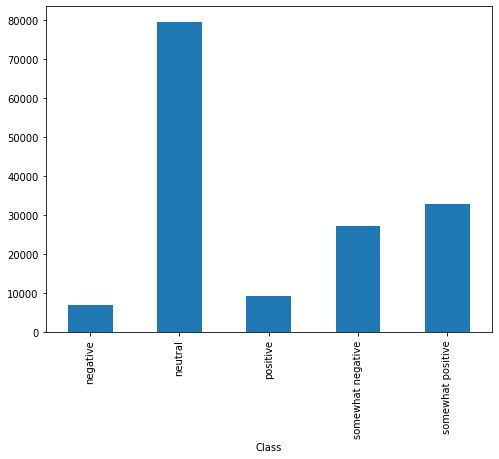

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
original_dataset.groupby('Class').Text_Reviews.count().plot.bar(ylim=0)
plt.show()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(original_dataset.Text_Reviews).toarray()
labels = original_dataset.Labels
features.shape

MemoryError: Unable to allocate 63.8 GiB for an array with shape (156060, 54911) and data type float64